## Analytics ibs of 1PM candlestick 1H => Long - Short signals

In [22]:
import warnings
warnings.filterwarnings('ignore')

import time
from datetime import date, datetime
from datetime import timedelta
from dateutil.relativedelta import relativedelta

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
import os
from pathlib import Path
notebook_path = os.getcwd()
algo_dir = Path(notebook_path).parent.parent
csv_file = str(algo_dir) + '/vn-stock-data/VN30ps/VN30F1M_5minutes.csv'
is_file = os.path.isfile(csv_file)
if is_file:
    dataset = pd.read_csv(csv_file, index_col='Date', parse_dates=True)
else:
    dataset = pd.read_csv("https://raw.githubusercontent.com/zuongthaotn/vn-stock-data/main/VN30ps/VN30F1M_5minutes.csv", index_col='Date', parse_dates=True)

In [24]:
# Ignore all candlesticks at 14:30 & 14:45
data = dataset[(dataset.index.hour != 14) | ( (dataset.index.hour == 14) & (dataset.index.minute != 30) & (dataset.index.minute != 45))]
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-08-13 09:00:00,943.5,943.6,942.9,943.1,1812
2018-08-13 09:05:00,943.1,943.5,942.9,943.3,1323
2018-08-13 09:10:00,943.2,943.3,942.6,943.1,1207
2018-08-13 09:15:00,943.1,943.1,942.3,942.6,1196
2018-08-13 09:20:00,942.6,943.7,942.4,943.7,1765
...,...,...,...,...,...
2024-06-19 14:05:00,1309.6,1316.7,1309.6,1316.7,14553
2024-06-19 14:10:00,1316.7,1321.3,1314.9,1320.4,17070
2024-06-19 14:15:00,1320.6,1325.0,1319.0,1322.7,15368


In [25]:
data = data.resample("H").agg({
        'Open': 'first',
        'Close': 'last',
        'High': 'max',
        'Low': 'min',
        'Volume': 'sum'
    })
data.dropna(inplace=True)

In [26]:
data['prev_Close'] = data['Close'].shift(1)
data['ibs'] = data.apply(
        lambda x: (1 if (x["High"] == x["Low"]) else (x["Close"] - x["Low"]) / (x["High"] - x["Low"])), axis=1)
data['ibs'] = data['ibs'].round(1)
data['body_heigh'] = data.apply(
        lambda x: abs(x["Close"] - x["Open"]), axis=1)
data['body_heigh'] = data['body_heigh'].round(1)
data['return'] = data.apply(
        lambda x: x['Close'] - x['prev_Close'], axis=1)
data['next_return'] = data['return'].shift(-1)

In [27]:
data_at_1pm = data[data.index.hour == 13]
data_at_1pm

,Open,Close,High,Low,Volume,prev_Close,ibs,body_heigh,return,next_return
Date,,,,,,,,,,
2018-08-13 13:00:00,947.5,949.9,950.2,946.7,21499,947.3,0.9,2.4,2.6,4.2
2018-08-14 13:00:00,954.5,959.5,959.7,952.5,24232,954.3,1.0,5.0,5.2,0.6
2018-08-15 13:00:00,957.7,959.2,959.9,954.7,22050,958.0,0.9,1.5,1.2,-8.0
2018-08-16 13:00:00,938.5,943.0,943.0,936.5,18173,938.1,1.0,4.5,4.9,1.5
2018-08-17 13:00:00,954.3,946.5,954.4,945.8,28876,954.3,0.1,7.8,-7.8,0.5
...,...,...,...,...,...,...,...,...,...,...
2024-06-13 13:00:00,1328.9,1332.2,1332.8,1326.6,48869,1329.0,0.9,3.3,3.2,5.2
2024-06-14 13:00:00,1332.6,1329.7,1335.9,1329.7,48831,1332.7,0.0,2.9,-3.0,-3.1
2024-06-17 13:00:00,1310.7,1309.7,1313.2,1306.4,59924,1310.5,0.5,1.0,-0.8,0.2


In [28]:
data_should_long = data_at_1pm[data_at_1pm['next_return'] > 0]
data_should_long['ibs']

Date
2018-08-13 13:00:00    0.9
2018-08-14 13:00:00    1.0
2018-08-16 13:00:00    1.0
2018-08-17 13:00:00    0.1
2018-08-21 13:00:00    0.8
                      ... 
2024-06-11 13:00:00    0.4
2024-06-12 13:00:00    1.0
2024-06-13 13:00:00    0.9
2024-06-17 13:00:00    0.5
2024-06-19 13:00:00    1.0
Name: ibs, Length: 751, dtype: float64

(array([ 41.,  66.,   0.,  64.,  52.,   0.,  65.,  56.,   0.,  67.,  82.,
          0.,  99., 100.,  59.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

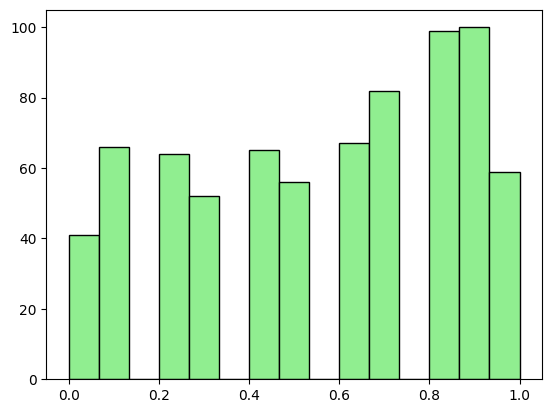

In [29]:
plt.hist(data_should_long['ibs'], color='lightgreen', ec='black', bins=15)

(array([37., 64.,  0., 87., 80.,  0., 71., 53.,  0., 57., 69.,  0., 68.,
        59., 44.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <BarContainer object of 15 artists>)

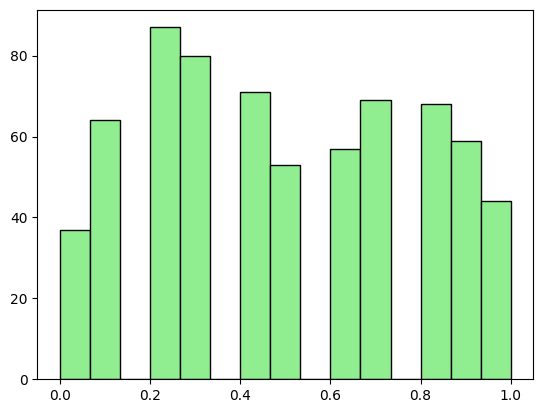

In [30]:
data_should_short = data_at_1pm[data_at_1pm['next_return'] < 0]
plt.hist(data_should_short['ibs'], color='lightgreen', ec='black', bins=15)

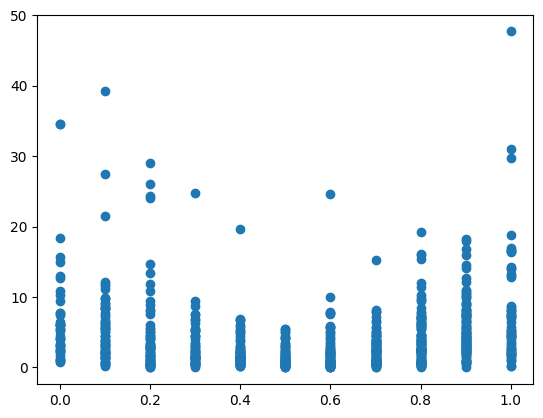

In [37]:
plt.plot(data_should_long['ibs'], data_should_long['body_heigh'], 'o')

In [39]:
grpd = data_should_long.groupby(['ibs', 'body_heigh'])[['next_return']]
grpd.mean()

next_return
ibs body_heigh             
0.0 0.8                 2.5
    0.9                 0.1
    1.0                 0.5
    1.1                 1.7
    1.3                 1.8
...                     ...
1.0 16.9               26.6
    18.8                6.7
    29.8               30.4
    31.0               11.2
    47.7                2.5

[513 rows x 1 columns]

In [40]:
grpd.count()

next_return
ibs body_heigh             
0.0 0.8                   1
    0.9                   1
    1.0                   1
    1.1                   1
    1.3                   1
...                     ...
1.0 16.9                  1
    18.8                  1
    29.8                  1
    31.0                  1
    47.7                  1

[513 rows x 1 columns]